In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
nids_original_dataframe = pd.read_csv('data/nids_data.csv')

#### **Data EDA**

In [261]:
print(nids_original_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [262]:
nids_original_dataframe.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433260e+04,3.491745e+03,0.000119,0.023777,0.000079,0.198079,0.001310,0.395324,0.227969,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.010912,0.260293,0.008910,2.154207,0.046708,0.488930,10.417355,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.300000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.000000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [263]:
nids_original_dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [264]:
print(nids_original_dataframe.isna().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [265]:
print(nids_original_dataframe['class'].unique())

['normal' 'anomaly']


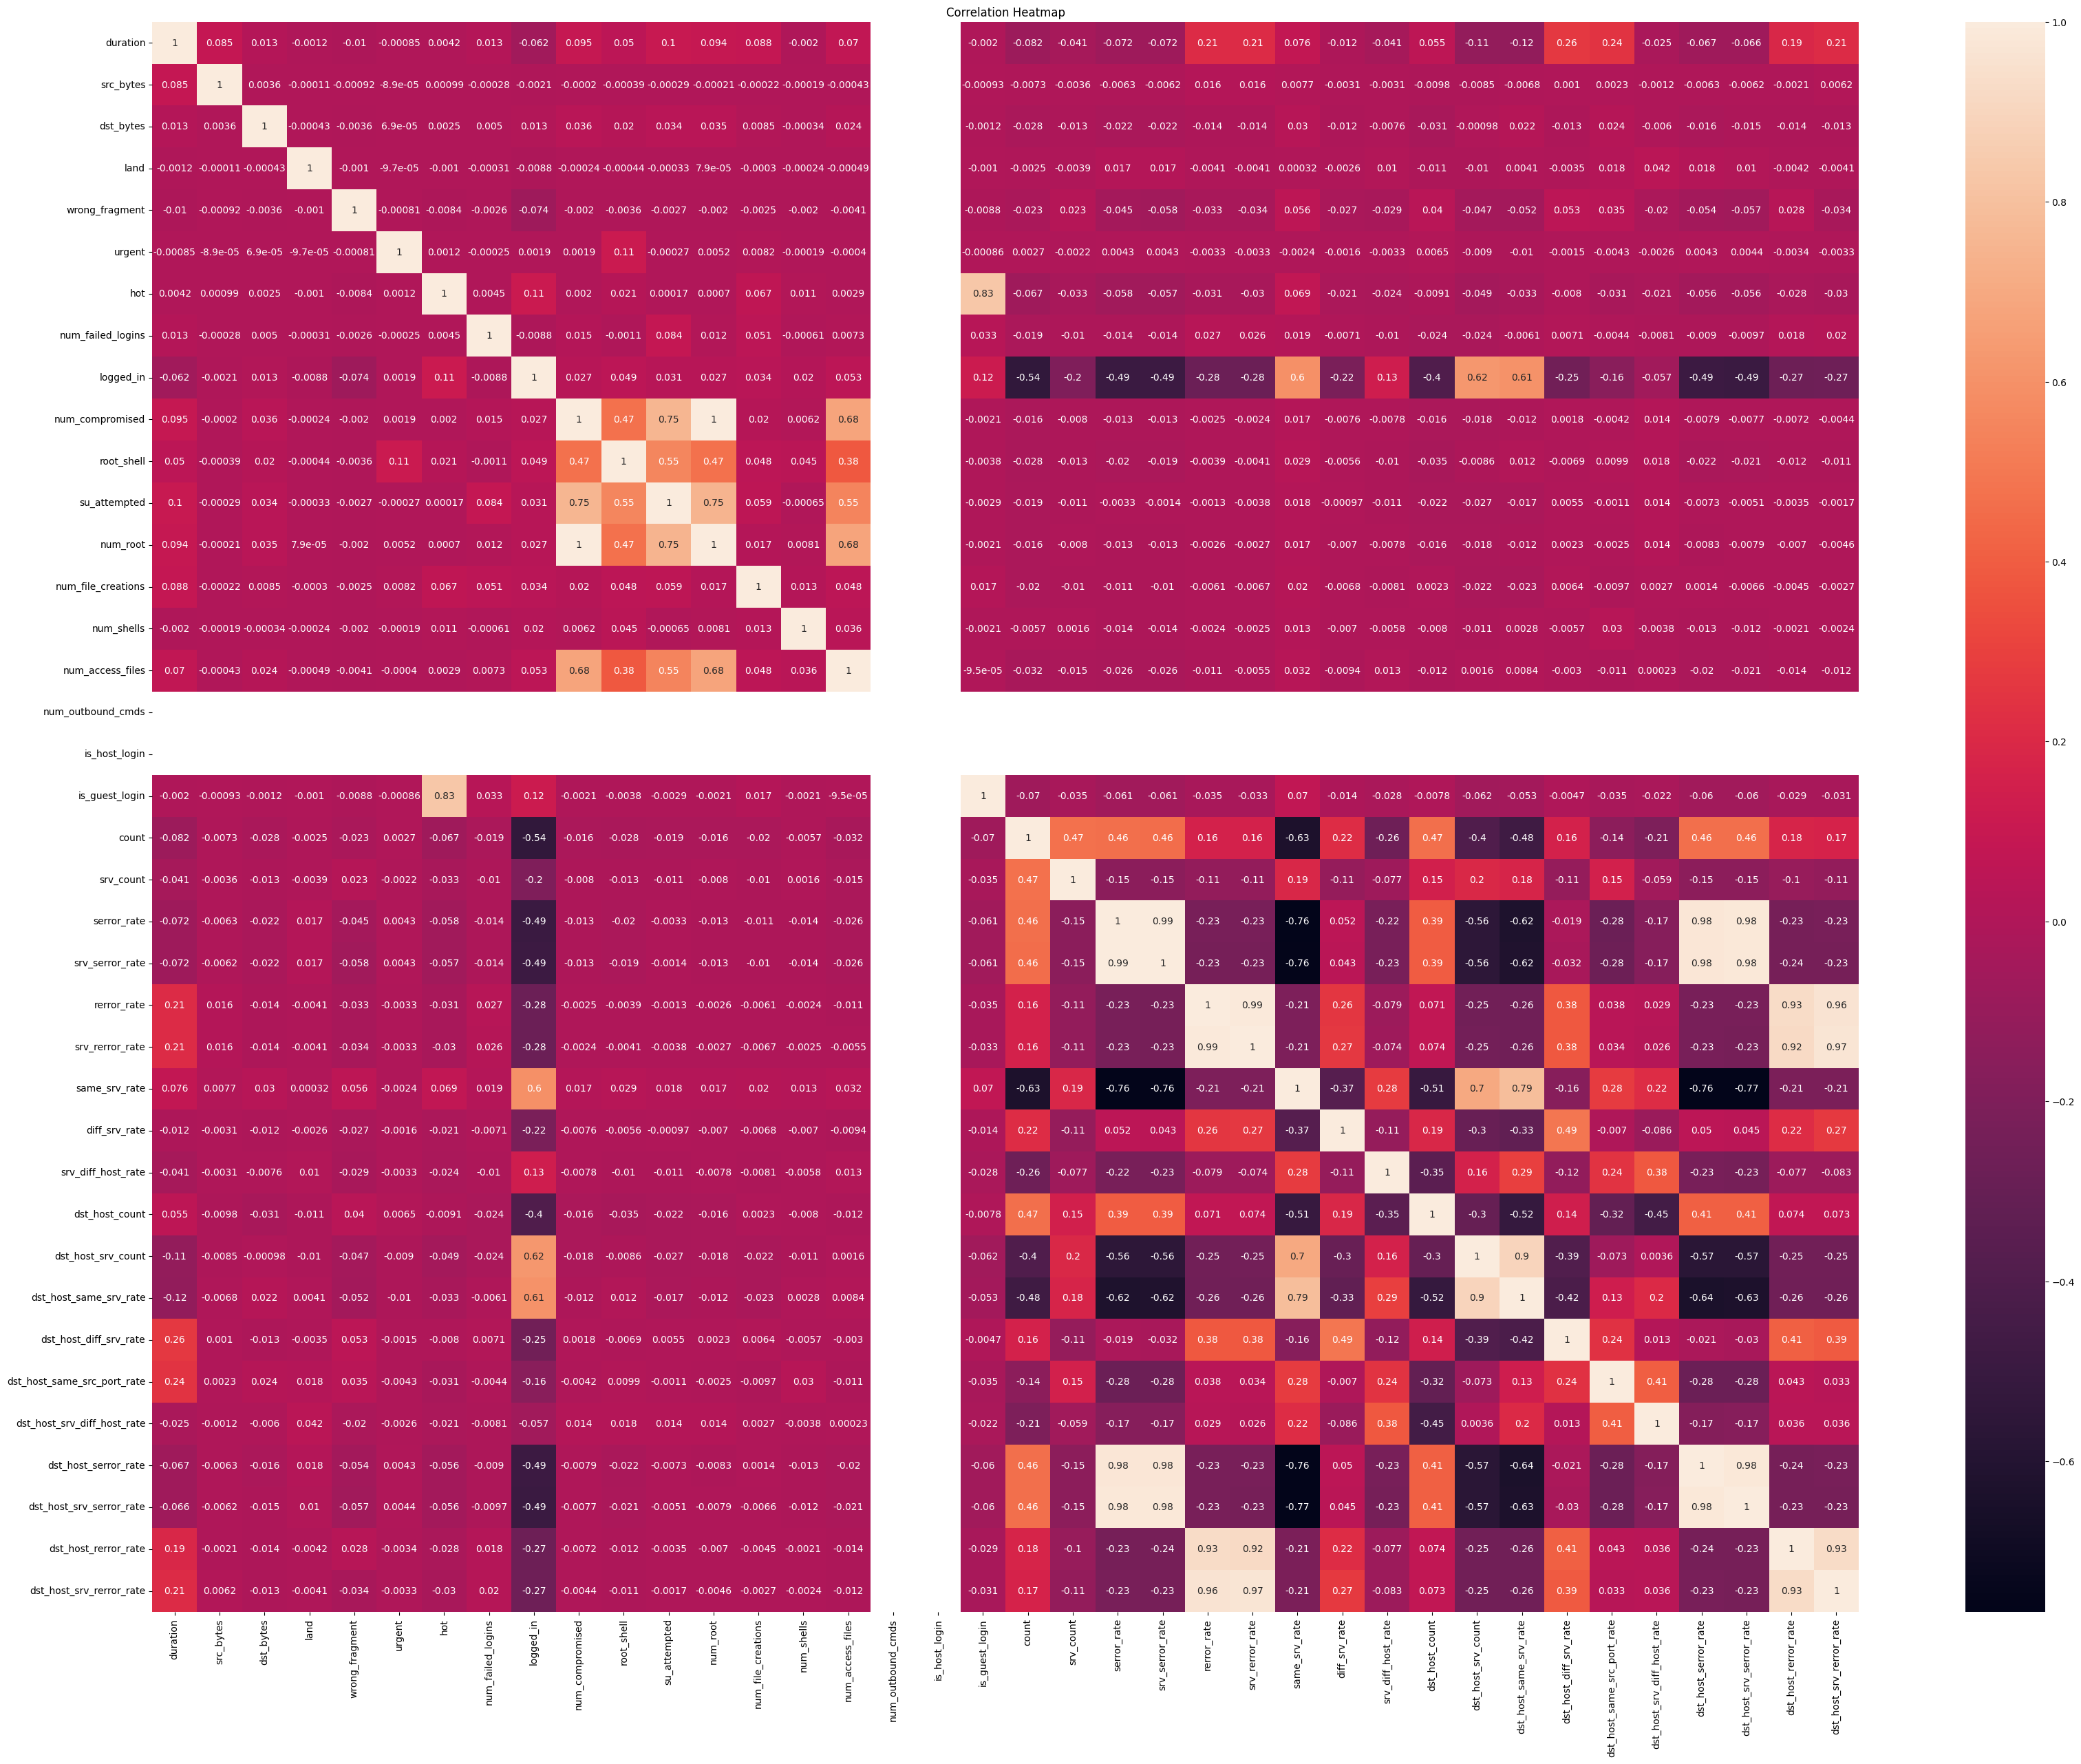

In [266]:
plt.figure(figsize=(40,30))
sns.heatmap(nids_original_dataframe.corr(numeric_only=True),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [267]:
single_value_features = []

for col in nids_original_dataframe.columns:
    if len(nids_original_dataframe[col].unique()) == 1:
        single_value_features.append(col)

print("Features with only a single value:")
print(single_value_features)


Features with only a single value:
['num_outbound_cmds', 'is_host_login']


In [268]:

# Drop the single value features from the DataFrame
nids_original_dataframe = nids_original_dataframe.drop(single_value_features, axis=1)


In [269]:

import pandas as pd

# Assuming df is your DataFrame containing the dataset
# If df is not defined, define it using your actual dataset

# Check for duplicate rows
duplicate_rows = nids_original_dataframe.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

if num_duplicate_rows > 0:
    print("The dataset has duplicate rows.")
    print("Number of duplicate rows:", num_duplicate_rows)
else:
    print("The dataset does not have any duplicate rows.")

The dataset does not have any duplicate rows.


In [270]:
categorical_columns = nids_original_dataframe.select_dtypes(include=['object']).columns.tolist()
numerical_columns = nids_original_dataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
['protocol_type', 'service', 'flag', 'class']

Numerical Columns:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [271]:
for col in categorical_columns:
    print(nids_original_dataframe[col].unique())

['tcp' 'udp' 'icmp']
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
['normal' 'anomaly']


In [272]:

numerical_columns = nids_original_dataframe.select_dtypes(exclude=['object']).columns.tolist()


In [273]:
rows_to_remove_categorical = []
for col in categorical_columns:
    values_to_remove_categorical = nids_original_dataframe[col].value_counts()[nids_original_dataframe[col].value_counts() < 10].index
    rows_to_remove_categorical.extend(nids_original_dataframe[nids_original_dataframe[col].isin(values_to_remove_categorical)].index)

# Remove duplicate indices
rows_to_remove_categorical = list(set(rows_to_remove_categorical))

# Drop the rows containing values with count less than 15
nids_original_dataframe = nids_original_dataframe.drop(rows_to_remove_categorical)

# Reset index after dropping rows
nids_original_dataframe = nids_original_dataframe.reset_index(drop=True)

# Display the updated DataFrame
print(nids_original_dataframe.shape)


(25174, 40)


In [274]:
for col in categorical_columns:
    print(nids_original_dataframe[col].unique())

['tcp' 'udp' 'icmp']
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'netbios_ssn' 'rje' 'X11']
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2']
['normal' 'anomaly']


In [275]:
import pandas as pd

# Assuming nids_original_dataframe is your DataFrame containing the data
categorical_col = nids_original_dataframe.select_dtypes(exclude=['number']).columns.tolist()
for col in categorical_col:
    print("Column:", col)
    print(nids_original_dataframe[col].value_counts())

Column: protocol_type
protocol_type
tcp     20517
udp      3011
icmp     1646
Name: count, dtype: int64
Column: service
service
http          8002
private       4349
domain_u      1820
smtp          1448
ftp_data      1396
              ... 
rje             20
remote_job      17
pop_2           17
printer         12
shell           11
Name: count, Length: 61, dtype: int64
Column: flag
flag
SF        14961
S0         7008
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
Name: count, dtype: int64
Column: class
class
normal     13422
anomaly    11752
Name: count, dtype: int64


In [276]:
print(nids_original_dataframe.shape)

(25174, 40)


In [277]:
print(nids_original_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25174 entries, 0 to 25173
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25174 non-null  int64  
 1   protocol_type                25174 non-null  object 
 2   service                      25174 non-null  object 
 3   flag                         25174 non-null  object 
 4   src_bytes                    25174 non-null  int64  
 5   dst_bytes                    25174 non-null  int64  
 6   land                         25174 non-null  int64  
 7   wrong_fragment               25174 non-null  int64  
 8   urgent                       25174 non-null  int64  
 9   hot                          25174 non-null  int64  
 10  num_failed_logins            25174 non-null  int64  
 11  logged_in                    25174 non-null  int64  
 12  num_compromised              25174 non-null  int64  
 13  root_shell      

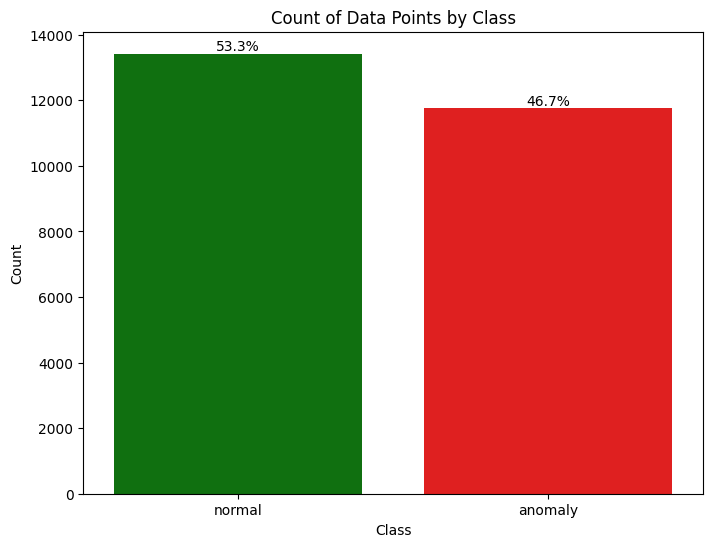

class
normal     13422
anomaly    11752
Name: count, dtype: int64


In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot with color for each class
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='class', data=nids_original_dataframe, palette=['green', 'red'], legend=False)
plt.title('Count of Data Points by Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Add percentage annotations
total_points = len(nids_original_dataframe)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1,
             '{:.1f}%'.format((height / total_points) * 100),
             ha='center', va='bottom')

plt.show()
print(nids_original_dataframe['class'].value_counts())

In [279]:
from sklearn.preprocessing import LabelEncoder

# Assuming nids_original_dataframe is your DataFrame

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
nids_original_dataframe['class'] = label_encoder.fit_transform(nids_original_dataframe['class'])

write = nids_original_dataframe.to_csv("file.csv", index=False)



In [280]:
print(nids_original_dataframe['class'].value_counts())

class
1    13422
0    11752
Name: count, dtype: int64


In [281]:
# sdd33

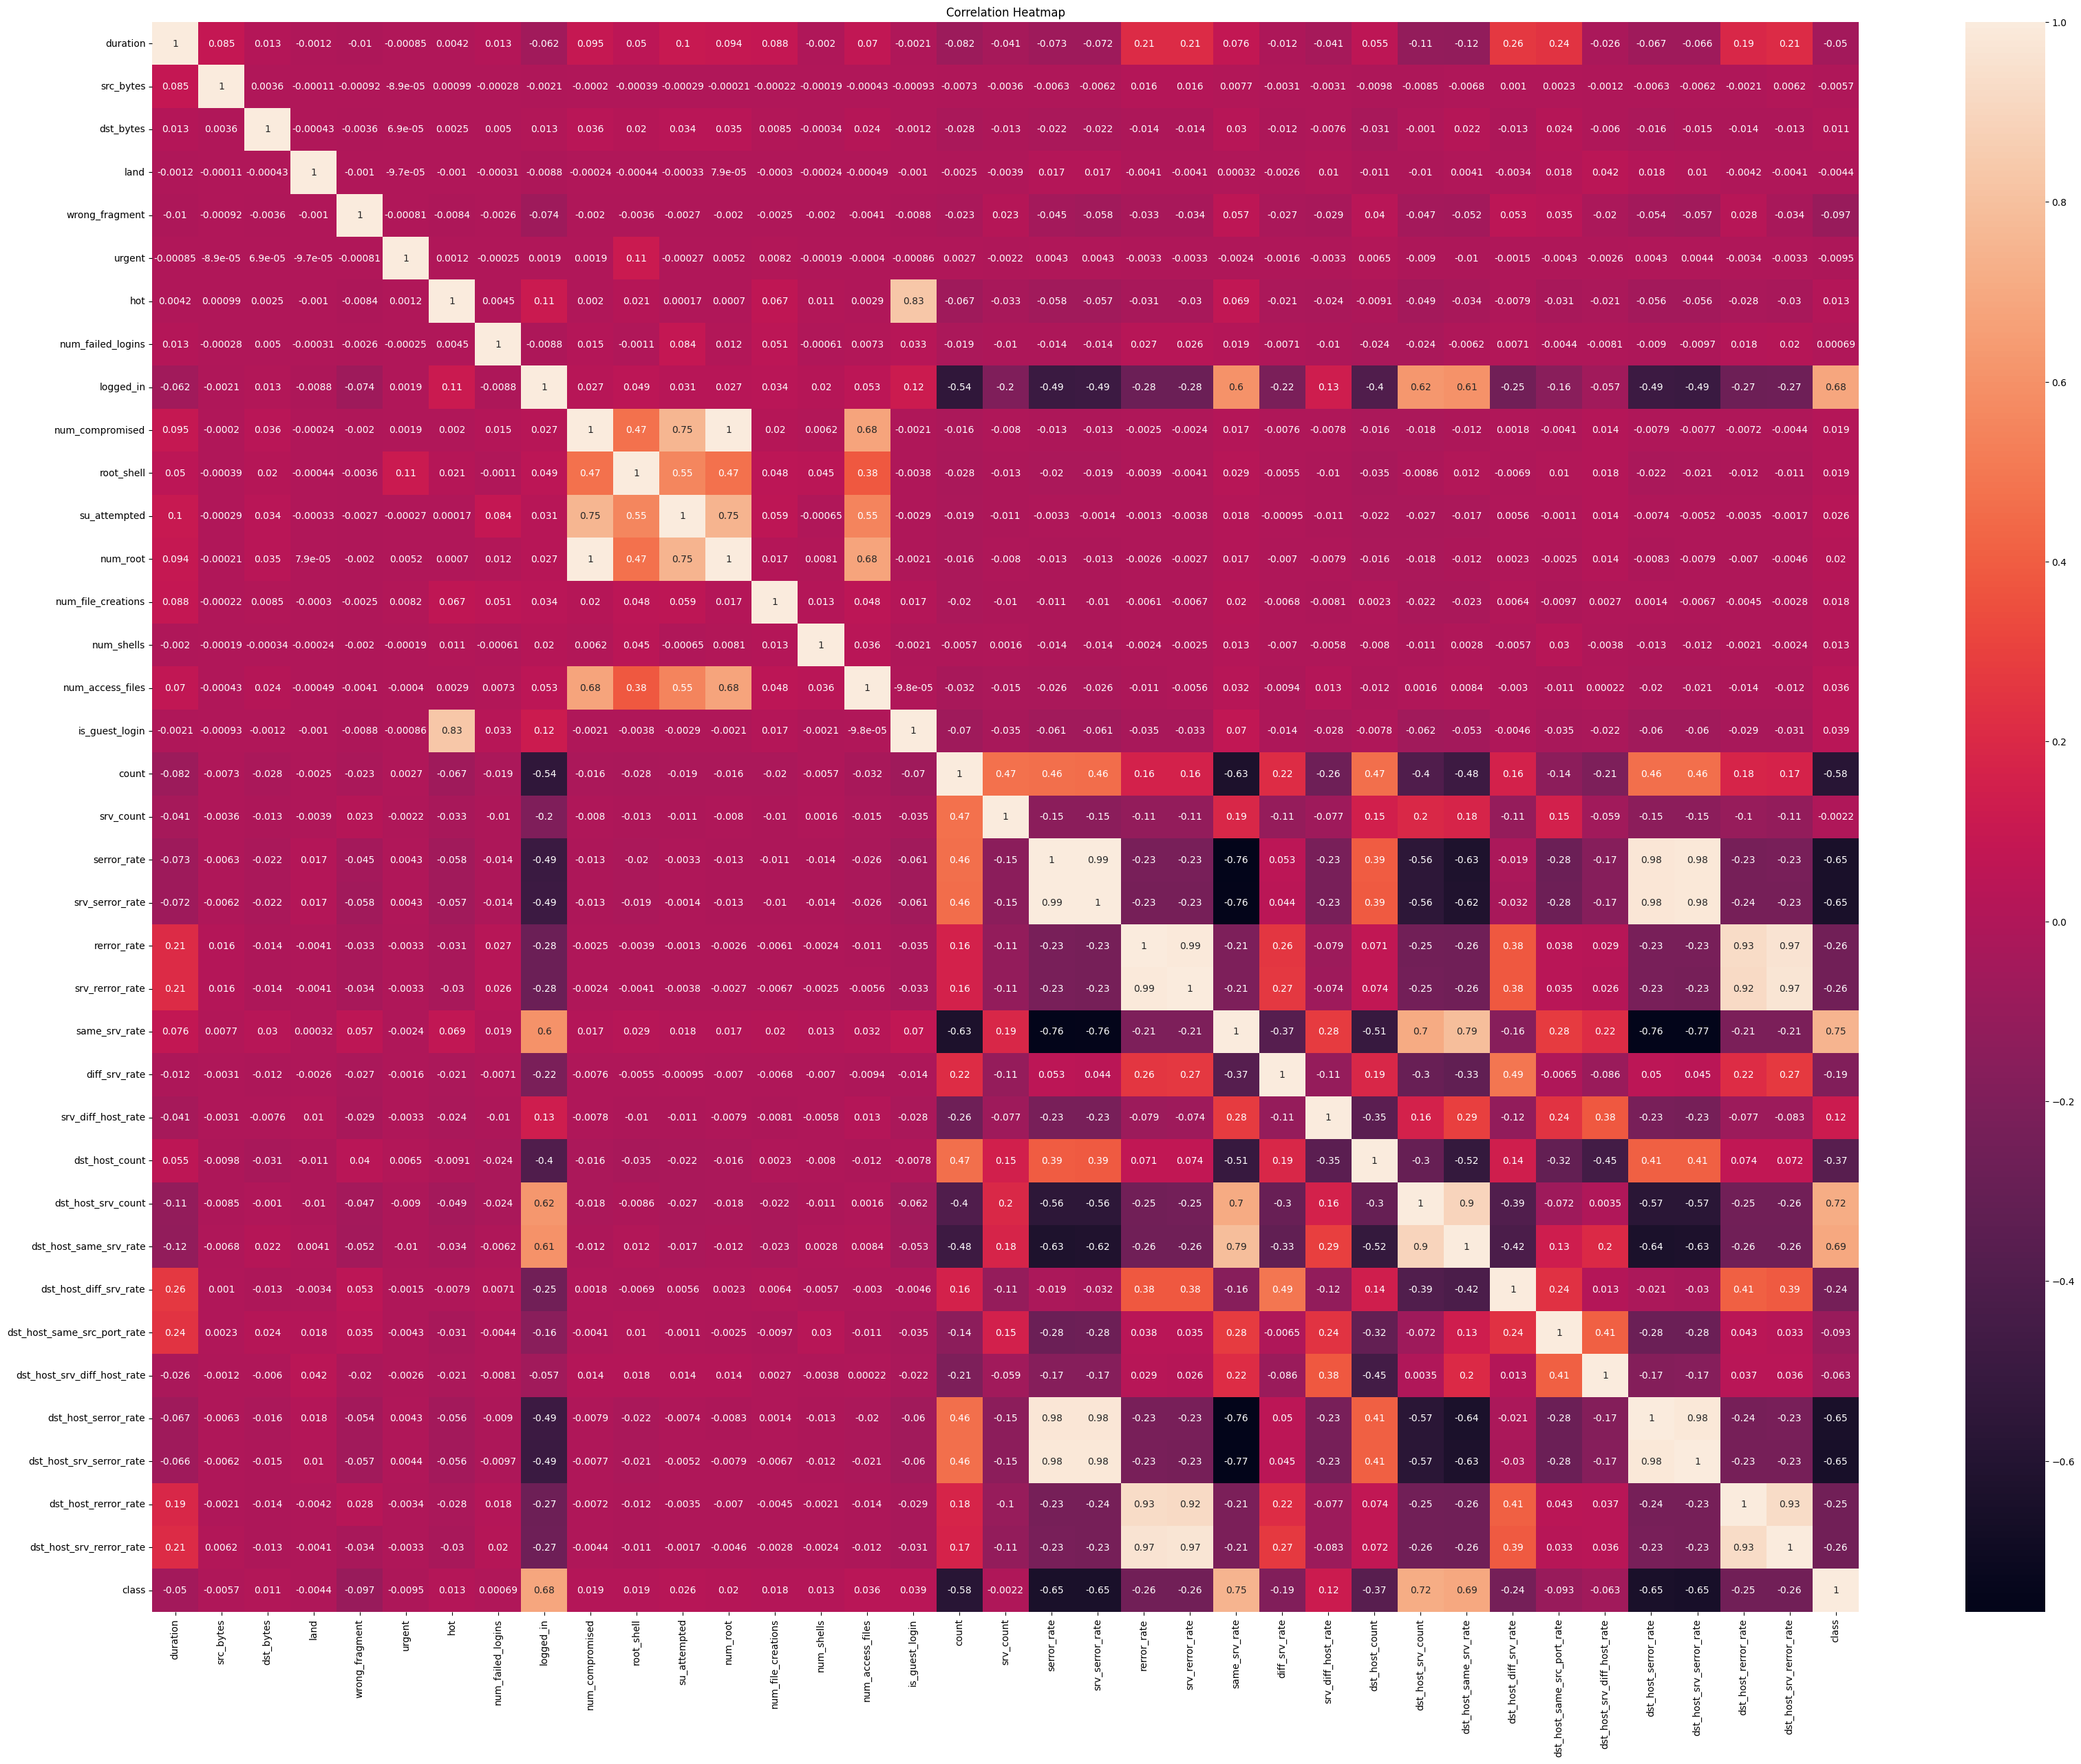

In [282]:
plt.figure(figsize=(40,30))
sns.heatmap(nids_original_dataframe.corr(numeric_only=True),annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Highly correlated

In [283]:
highly_correlated_features = ['dst_host_serror_rate','dst_host_rerror_rate', 'srv_rerror_rate','srv_serror_rate', 'num_root']
nids_original_dataframe.drop(highly_correlated_features , axis=1, inplace=True)


In [284]:
from sklearn.feature_selection import mutual_info_classif
nids_num = nids_original_dataframe.select_dtypes(include=['number'])
X_val = nids_num.drop(['class'], axis=1)
y_val = nids_original_dataframe['class']
mutual_info = mutual_info_classif(X_val,y_val)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_val.columns
mutual_info.sort_values(ascending=False)


src_bytes                      0.553486
dst_bytes                      0.432368
diff_srv_rate                  0.356162
same_srv_rate                  0.350261
dst_host_srv_count             0.324976
dst_host_same_srv_rate         0.302414
dst_host_diff_srv_rate         0.286215
logged_in                      0.274549
dst_host_srv_serror_rate       0.270228
serror_rate                    0.269579
count                          0.260345
dst_host_srv_diff_host_rate    0.184718
dst_host_same_src_port_rate    0.132969
dst_host_count                 0.130525
srv_diff_host_rate             0.096998
srv_count                      0.063109
dst_host_srv_rerror_rate       0.059139
rerror_rate                    0.041922
duration                       0.028362
wrong_fragment                 0.013721
num_shells                     0.004975
hot                            0.004457
num_access_files               0.003222
urgent                         0.003067
land                           0.002777


In [285]:
selected_features = mutual_info[mutual_info >0.1]

# Convert the selected features to a list
significant_features = selected_features.index.tolist()
insignicant_features = mutual_info[mutual_info <0.1]
insignificant_features = insignicant_features.index.tolist()


<Axes: >

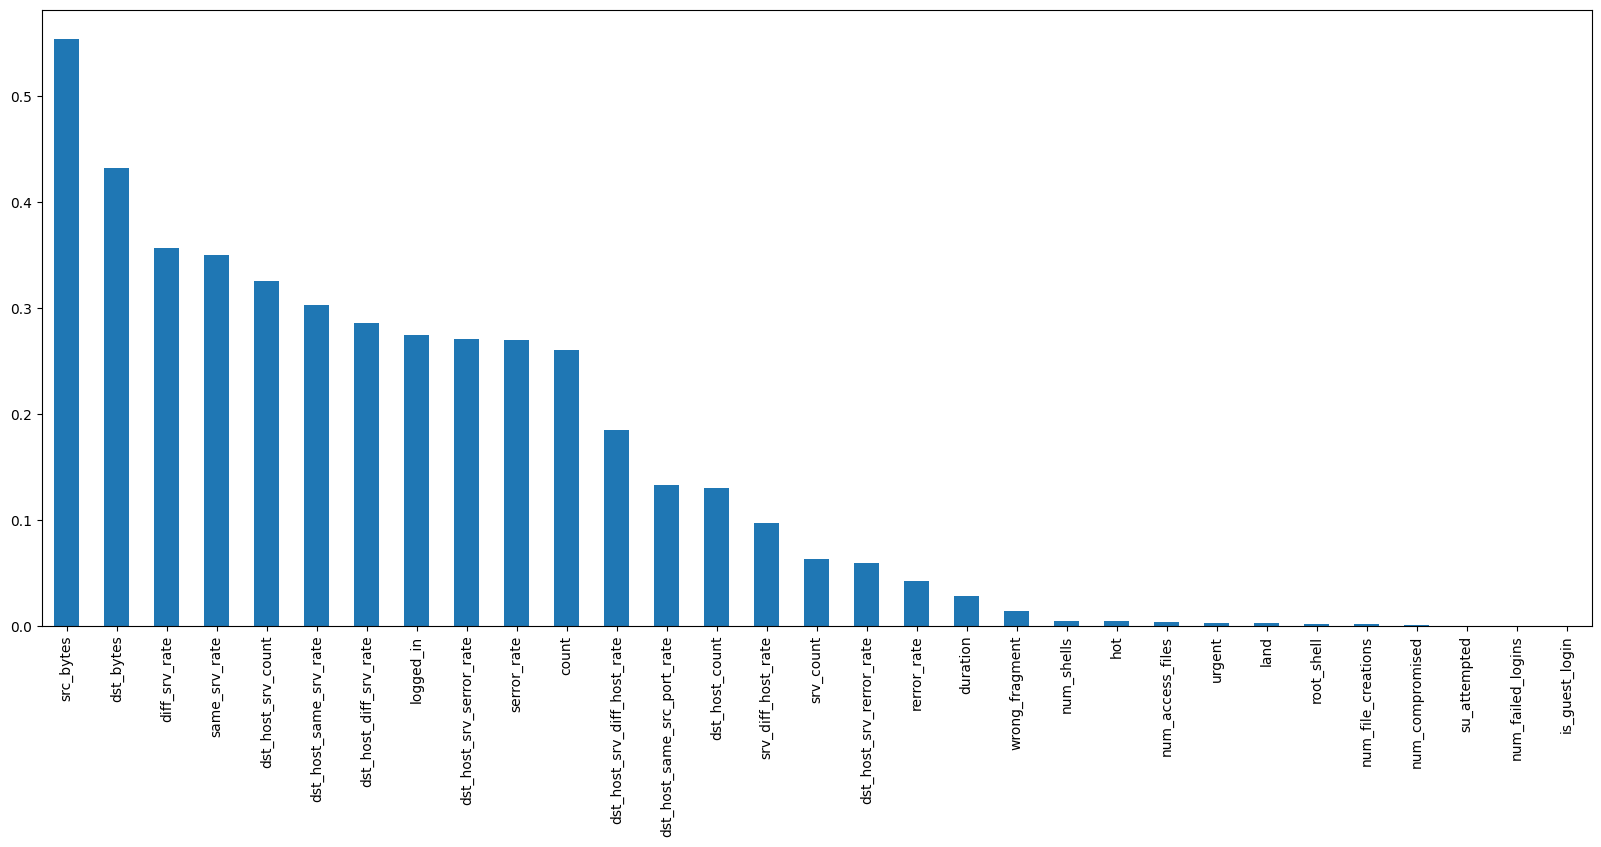

In [286]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [287]:
print(insignificant_features)

['duration', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'srv_count', 'rerror_rate', 'srv_diff_host_rate', 'dst_host_srv_rerror_rate']


In [288]:

nids_original_dataframe.drop(insignificant_features , axis=1, inplace=True)

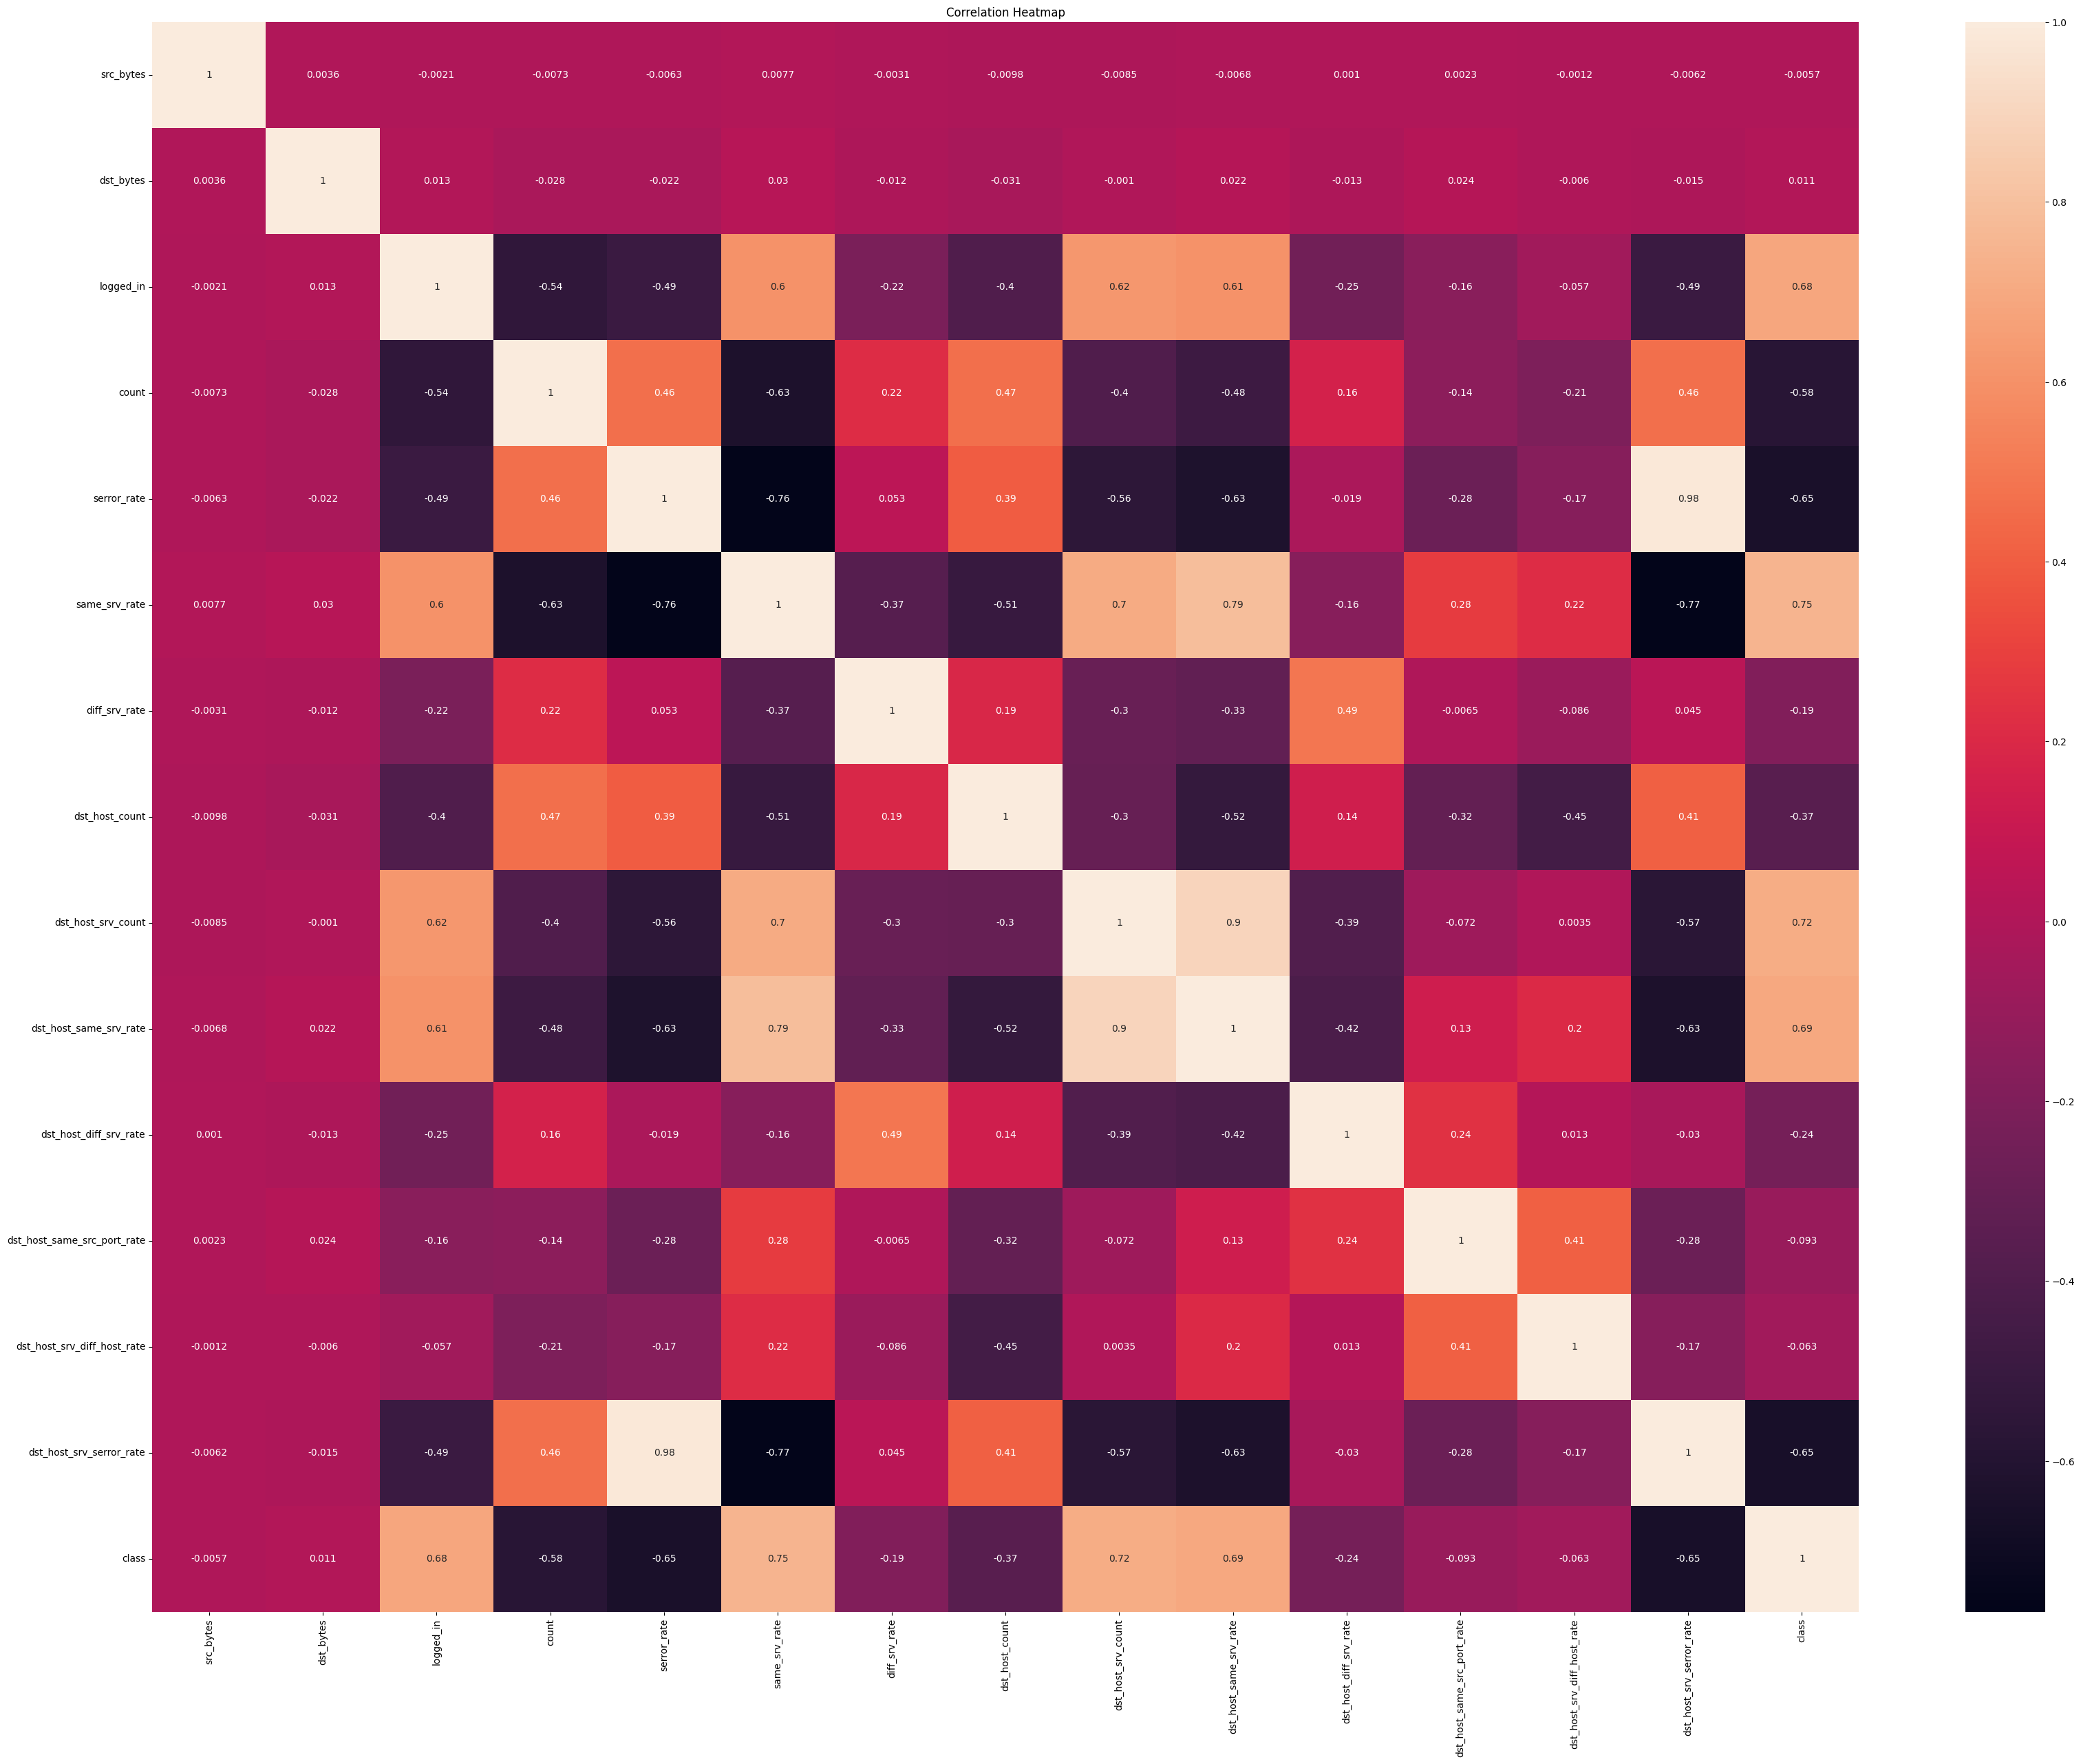

In [289]:
plt.figure(figsize=(40,30))
sns.heatmap(nids_original_dataframe.corr(numeric_only=True),annot=True)
plt.title('Correlation Heatmap')
plt.show()

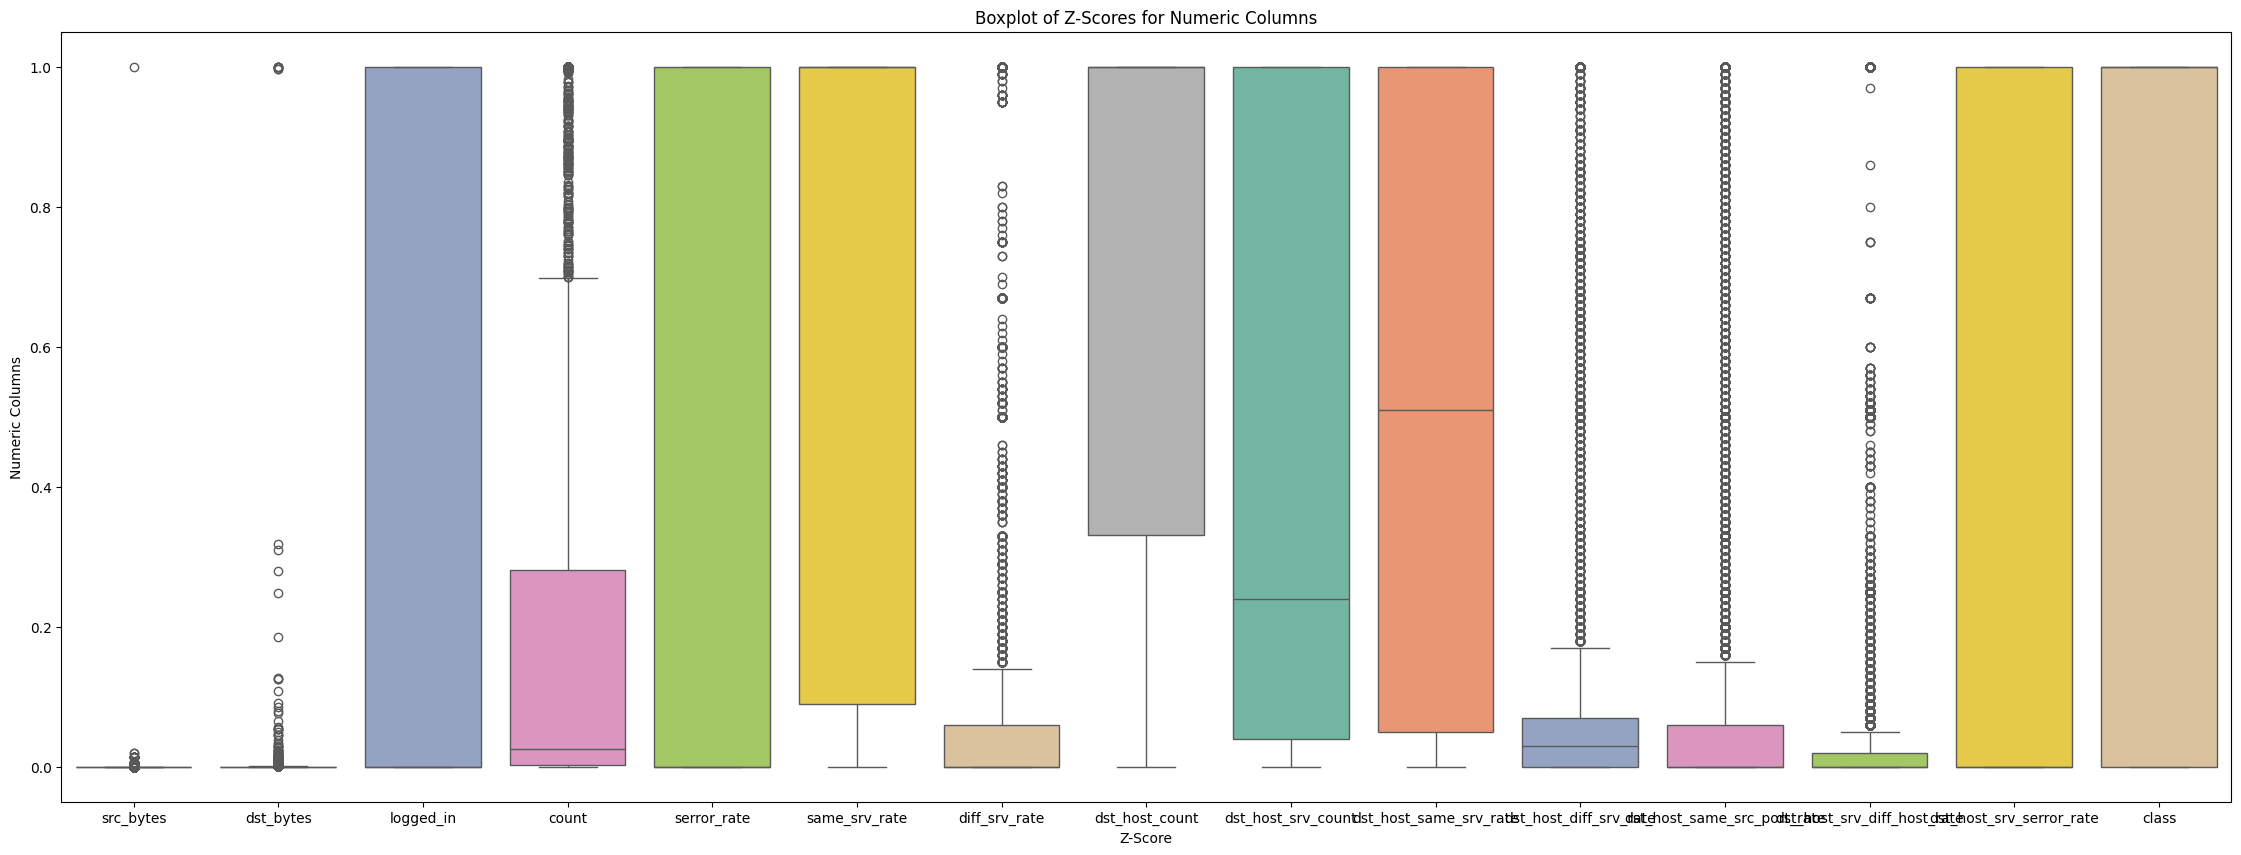

Total data row count => 25174
Outlier row count => 2518


In [290]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
# Calculate z-scores for each numeric column

nids_numeric = nids_original_dataframe.copy()
nids_numeric = nids_numeric.select_dtypes(include=['number'])
z_scores = stats.zscore(nids_numeric)

# Create a DataFrame of z-scores
z_scores_df = pd.DataFrame(z_scores, columns=nids_numeric.columns)




# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the data
scaled_data = scaler.fit_transform(z_scores_df)

# Create a DataFrame of the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=z_scores_df.columns)

# Set up the boxplot figure for scaled data
plt.figure(figsize=(28, 10))

# Draw boxplots for each numeric column
sns.boxplot(data=scaled_data_df, orient='v', palette='Set2')

# Add title and labels
plt.title('Boxplot of Z-Scores for Numeric Columns')
plt.xlabel('Z-Score')
plt.ylabel('Numeric Columns')

# Display the plot
plt.show()

threshold = 3
abs_z_scores = np.abs(z_scores)
# Find rows with any z-score exceeding the threshold
print("Total data row count =>", nids_original_dataframe.shape[0])
outlier_rows = nids_original_dataframe[(abs_z_scores > threshold).any(axis=1)]
print("Outlier row count =>", outlier_rows.shape[0])


In [291]:
# We only take the data with no outliers
nids_original_dataframe = nids_original_dataframe[(abs_z_scores < threshold).all(axis=1)]


In [292]:
print(nids_original_dataframe)

      protocol_type   service  flag  src_bytes  dst_bytes  logged_in  count  \
0               tcp  ftp_data    SF        491          0          0      2   
1               udp     other    SF        146          0          0     13   
2               tcp   private    S0          0          0          0    123   
3               tcp      http    SF        232       8153          1      5   
4               tcp      http    SF        199        420          1     30   
...             ...       ...   ...        ...        ...        ...    ...   
25169           tcp      exec  RSTO          0          0          0    100   
25170           tcp  ftp_data    SF        334          0          1      1   
25171           tcp   private   REJ          0          0          0    105   
25172           tcp      nnsp    S0          0          0          0    129   
25173           tcp    finger    S0          0          0          0     38   

       serror_rate  same_srv_rate  diff_srv_rate  d

In [293]:
numeric_dataframe = nids_original_dataframe.select_dtypes(include=['number'])
print(numeric_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 0 to 25173
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   src_bytes                    22656 non-null  int64  
 1   dst_bytes                    22656 non-null  int64  
 2   logged_in                    22656 non-null  int64  
 3   count                        22656 non-null  int64  
 4   serror_rate                  22656 non-null  float64
 5   same_srv_rate                22656 non-null  float64
 6   diff_srv_rate                22656 non-null  float64
 7   dst_host_count               22656 non-null  int64  
 8   dst_host_srv_count           22656 non-null  int64  
 9   dst_host_same_srv_rate       22656 non-null  float64
 10  dst_host_diff_srv_rate       22656 non-null  float64
 11  dst_host_same_src_port_rate  22656 non-null  float64
 12  dst_host_srv_diff_host_rate  22656 non-null  float64
 13  dst_host_srv_serror_r

In [294]:
significant_features += ['class']
print(significant_features)


['src_bytes', 'dst_bytes', 'logged_in', 'count', 'serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'class']


In [295]:
# sns.pairplot(nids_original_dataframe[significant_features], hue='class')

In [296]:
# import matplotlib.pyplot as plt
# import matplotlib.pylab as pylab
# import seaborn as sns

# # Compute min-max normalization
# min_vals = nids_original_dataframe[significant_features].min()
# max_vals = nids_original_dataframe[significant_features].max()
# normalized_data = (nids_original_dataframe[significant_features] - min_vals) / (max_vals - min_vals)

# params = {
#     'legend.fontsize': 'x-large',
#     'figure.figsize': (2, 4),
#     'axes.labelsize': 'x-large',
#     'axes.titlesize': 'x-large',
#     'xtick.labelsize': 'x-large',
#     'ytick.labelsize': 'x-large'
# }
# pylab.rcParams.update(params)

# plt.figure(figsize=(30, 30))

# num_cols = 3
# num_rows = int(normalized_data.shape[1] / num_cols) + 1

# for index, col in enumerate(normalized_data.drop('class', axis=1).columns):
#     plt.subplot(num_rows, num_cols, index + 1)
#     sns.histplot(normalized_data, x=col, hue='class', kde=True, bins=10)

#     # Increase x-axis and y-axis title font size
#     plt.xlabel(col, fontsize=10)
#     plt.ylabel('Count', fontsize=10)

# plt.tight_layout()
# plt.show()


In [297]:
# from scipy.stats import norm


# # Remove 'class' from the list
# significant_features_copy = significant_features.copy()
# try:
    
#     significant_features_copy.remove('class')
# except:
#     print("")

# significant_feat_df = nids_original_dataframe[significant_features_copy]

# num_features = len(significant_feat_df.columns)
# num_rows = int(np.ceil(num_features**0.5))
# num_cols = int(np.ceil(num_features / num_rows))

# # Plot histogram subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))

# for i, col in enumerate(significant_feat_df.columns):
#     ax = axes[i // num_cols, i % num_cols]
#     ax.hist(significant_feat_df[col], bins=10, color='skyblue', edgecolor='black', density=True)
#     ax.set_title(col)

#     # Fit a normal distribution to the data
#     mu, std = norm.fit(significant_feat_df[col])
    
#     # Plot the normal distribution curve
#     xmin, xmax = ax.get_xlim()
#     x = np.linspace(xmin, xmax, 100)
#     p = norm.pdf(x, mu, std)
#     ax.plot(x, p, 'k', linewidth=1)

# # Hide any empty subplots
# for j in range(num_features, num_rows * num_cols):
#     axes.flatten()[j].axis('off')

# plt.tight_layout()
# plt.show()

In [298]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(32, 32))

# num_cols = 5
# num_rows = int(nids_original_dataframe[significant_features].shape[1] / num_cols) + 1

# for index, col in enumerate(nids_original_dataframe[significant_features].drop('class', axis=1).columns):
#     plt.subplot(num_rows, num_cols, index + 1)
#     sns.scatterplot(data=nids_original_dataframe[significant_features], x=col, y='class', hue=nids_original_dataframe['class'], legend=False)

#     # Increase x-axis and y-axis title font size
#     plt.xlabel(col, fontsize=20)
#     plt.ylabel('class', fontsize=20)

# plt.tight_layout()
# plt.show()


In [299]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Manually calculate minimum and maximum values for each feature
# min_vals = nids_original_dataframe[significant_features].drop('class', axis=1).min()
# max_vals = nids_original_dataframe[significant_features].drop('class', axis=1).max()

# # Perform Min-Max normalization
# scaled_data = (nids_original_dataframe[significant_features].drop('class', axis=1) - min_vals) / (max_vals - min_vals)

# plt.figure(figsize=(14, 10))

# num_cols = 3
# num_rows = int(scaled_data.shape[1] / num_cols) + 1

# for index, col in enumerate(nids_original_dataframe[significant_features].drop('class', axis=1).columns):
#     plt.subplot(num_rows, num_cols, index + 1)
#     sns.boxplot(data=scaled_data, x=nids_original_dataframe['class'], y=col, hue=nids_original_dataframe['class'],legend=False)

#     # Increase x-axis and y-axis title font size
#     plt.xlabel('class', fontsize=10)
#     plt.ylabel(col, fontsize=10)

# plt.tight_layout()
# plt.show()

In [300]:
print(nids_original_dataframe['class'])

0        1
1        1
2        0
3        1
4        1
        ..
25169    0
25170    0
25171    0
25172    0
25173    0
Name: class, Length: 22656, dtype: int64


In [301]:
print(nids_original_dataframe.head())

  protocol_type   service flag  src_bytes  dst_bytes  logged_in  count  \
0           tcp  ftp_data   SF        491          0          0      2   
1           udp     other   SF        146          0          0     13   
2           tcp   private   S0          0          0          0    123   
3           tcp      http   SF        232       8153          1      5   
4           tcp      http   SF        199        420          1     30   

   serror_rate  same_srv_rate  diff_srv_rate  dst_host_count  \
0          0.0           1.00           0.00             150   
1          0.0           0.08           0.15             255   
2          1.0           0.05           0.07             255   
3          0.2           1.00           0.00              30   
4          0.0           1.00           0.00             255   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                  25                    0.17                    0.03   
1                   1   

In [302]:
print(nids_original_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 0 to 25173
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   protocol_type                22656 non-null  object 
 1   service                      22656 non-null  object 
 2   flag                         22656 non-null  object 
 3   src_bytes                    22656 non-null  int64  
 4   dst_bytes                    22656 non-null  int64  
 5   logged_in                    22656 non-null  int64  
 6   count                        22656 non-null  int64  
 7   serror_rate                  22656 non-null  float64
 8   same_srv_rate                22656 non-null  float64
 9   diff_srv_rate                22656 non-null  float64
 10  dst_host_count               22656 non-null  int64  
 11  dst_host_srv_count           22656 non-null  int64  
 12  dst_host_same_srv_rate       22656 non-null  float64
 13  dst_host_diff_srv_rat

In [303]:
# # Perform one-hot encoding for nominal categorical columns
categorical_columns = nids_original_dataframe.select_dtypes(exclude=['number']).columns.tolist()
print(categorical_columns)


# print("Initialization of One-hot Encoding")
# nids_original_dataframe = pd.get_dummies(nids_original_dataframe, columns=['protocol_type'])
# nids_original_dataframe = nids_original_dataframe.map(lambda x: 1 if x == True else (0 if x == False else x))
# print("One-hot Encoding Completed")


print("Initialing Label Encoding")
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
    
    # Apply LabelEncoder to each column with categorical values
for column in nids_original_dataframe.columns:
    if nids_original_dataframe[column].dtype == 'object':  # Check if the column contains categorical values
        nids_original_dataframe[column] = label_encoder.fit_transform(nids_original_dataframe[column])
print("Label Encoding Completed")


['protocol_type', 'service', 'flag']
Initialing Label Encoding
Label Encoding Completed


In [304]:
print(nids_original_dataframe.shape)

(22656, 18)


In [305]:
#re-indexing of target column which changed during transformation

column_name = 'class'
column_index = nids_original_dataframe.columns.get_loc(column_name)
# Moved 'class' column moved to the last position
new_column_order = list(nids_original_dataframe.columns[:column_index]) + list(nids_original_dataframe.columns[column_index+1:]) + [column_name]

# Reindex the DataFrame with the new column order
nids_original_dataframe = nids_original_dataframe.reindex(columns=new_column_order)



In [306]:
print(nids_original_dataframe.head())

   protocol_type  service  flag  src_bytes  dst_bytes  logged_in  count  \
0              1       19     8        491          0          0      2   
1              2       40     8        146          0          0     13   
2              1       44     4          0          0          0    123   
3              1       22     8        232       8153          1      5   
4              1       22     8        199        420          1     30   

   serror_rate  same_srv_rate  diff_srv_rate  dst_host_count  \
0          0.0           1.00           0.00             150   
1          0.0           0.08           0.15             255   
2          1.0           0.05           0.07             255   
3          0.2           1.00           0.00              30   
4          0.0           1.00           0.00             255   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                  25                    0.17                    0.03   
1                 

In [307]:
nids_original_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 0 to 25173
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   protocol_type                22656 non-null  int64  
 1   service                      22656 non-null  int64  
 2   flag                         22656 non-null  int64  
 3   src_bytes                    22656 non-null  int64  
 4   dst_bytes                    22656 non-null  int64  
 5   logged_in                    22656 non-null  int64  
 6   count                        22656 non-null  int64  
 7   serror_rate                  22656 non-null  float64
 8   same_srv_rate                22656 non-null  float64
 9   diff_srv_rate                22656 non-null  float64
 10  dst_host_count               22656 non-null  int64  
 11  dst_host_srv_count           22656 non-null  int64  
 12  dst_host_same_srv_rate       22656 non-null  float64
 13  dst_host_diff_srv_rat

In [308]:
print(nids_original_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 0 to 25173
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   protocol_type                22656 non-null  int64  
 1   service                      22656 non-null  int64  
 2   flag                         22656 non-null  int64  
 3   src_bytes                    22656 non-null  int64  
 4   dst_bytes                    22656 non-null  int64  
 5   logged_in                    22656 non-null  int64  
 6   count                        22656 non-null  int64  
 7   serror_rate                  22656 non-null  float64
 8   same_srv_rate                22656 non-null  float64
 9   diff_srv_rate                22656 non-null  float64
 10  dst_host_count               22656 non-null  int64  
 11  dst_host_srv_count           22656 non-null  int64  
 12  dst_host_same_srv_rate       22656 non-null  float64
 13  dst_host_diff_srv_rat

In [309]:


categorical_columns = nids_original_dataframe.select_dtypes(exclude=['number']).columns.tolist()
print(categorical_columns)

catego_df = pd.DataFrame()
for col in categorical_columns:
    catego_df[col] = nids_original_dataframe[col]

print(catego_df)

[]
Empty DataFrame
Columns: []
Index: []


In [310]:
dataset_target = nids_original_dataframe['class'].values
dataset_features = nids_original_dataframe.drop(['class'], axis=1)



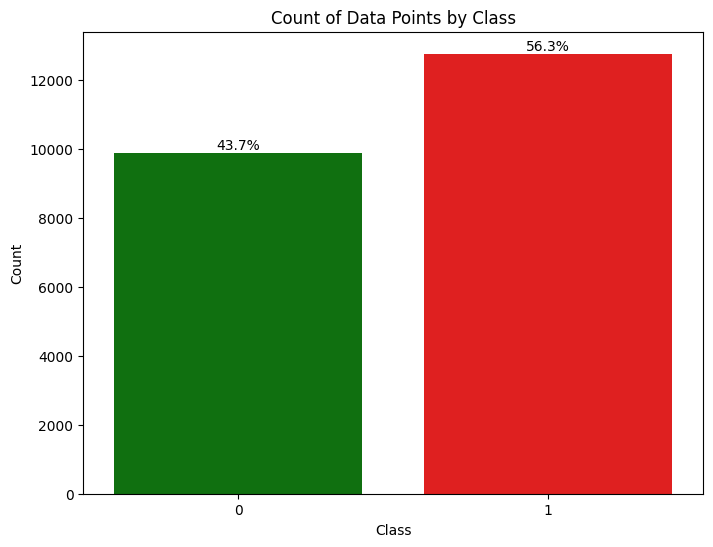

class
1    12761
0     9895
Name: count, dtype: int64


In [311]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot with color for each class
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='class', data=nids_original_dataframe, palette=['green', 'red'], legend=False)
plt.title('Count of Data Points by Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Add percentage annotations
total_points = len(nids_original_dataframe)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1,
             '{:.1f}%'.format((height / total_points) * 100),
             ha='center', va='bottom')

plt.show()
print(nids_original_dataframe['class'].value_counts())

In [312]:
print(nids_original_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 0 to 25173
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   protocol_type                22656 non-null  int64  
 1   service                      22656 non-null  int64  
 2   flag                         22656 non-null  int64  
 3   src_bytes                    22656 non-null  int64  
 4   dst_bytes                    22656 non-null  int64  
 5   logged_in                    22656 non-null  int64  
 6   count                        22656 non-null  int64  
 7   serror_rate                  22656 non-null  float64
 8   same_srv_rate                22656 non-null  float64
 9   diff_srv_rate                22656 non-null  float64
 10  dst_host_count               22656 non-null  int64  
 11  dst_host_srv_count           22656 non-null  int64  
 12  dst_host_same_srv_rate       22656 non-null  float64
 13  dst_host_diff_srv_rat

In [313]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_features_standardized = scaler.fit_transform(dataset_features)

In [314]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit_transform(dataset_features_standardized)

array([[ 6.11095989e-01,  4.39842488e-01,  6.49217993e-01, ...,
        -6.31385697e-02, -2.34190940e-01,  2.13628207e-02],
       [-2.08584909e+00,  3.10798742e+00,  6.63611439e+00, ...,
        -1.43895277e+00,  4.95198535e-01,  4.55469147e-02],
       [-3.28318333e+00, -1.11490660e-01, -6.16534297e-01, ...,
        -2.25403135e-01,  6.83024545e-02, -1.20779088e-02],
       ...,
       [-2.36172205e+00,  4.05790804e-01,  4.26044480e-01, ...,
        -3.87577935e-01,  1.04492090e-01,  1.18313033e-02],
       [-3.16531425e+00, -1.39556128e-01, -5.68267412e-01, ...,
        -7.66165427e-02,  1.89511605e-02, -1.66467601e-02],
       [-2.55124322e+00, -2.70619617e-01, -6.62424534e-01, ...,
        -4.69172061e-02, -8.93182729e-04, -3.84724547e-02]])

In [315]:
pca.n_components_

17

In [316]:
pca.explained_variance_ratio_

array([0.40076341, 0.10578253, 0.08815088, 0.07055818, 0.05882276,
       0.05140072, 0.0411502 , 0.03942564, 0.03786194, 0.03023977,
       0.02245352, 0.02004066, 0.01653493, 0.00892017, 0.00388294,
       0.00298997, 0.00102178])

In [317]:
pca.get_covariance()

array([[ 1.00004414, -0.09709226,  0.17749113, -0.01314389, -0.05493577,
        -0.19981281,  0.03984679, -0.15642549,  0.14779752, -0.01150935,
         0.17518001,  0.13516189,  0.10546093,  0.11450819, -0.0723161 ,
        -0.27419254, -0.15432017],
       [-0.09709226,  1.00004414, -0.26687861, -0.03567991, -0.0612658 ,
        -0.14468976,  0.12755947,  0.28732817, -0.34295957,  0.24585477,
         0.14000095, -0.39872962, -0.41237629,  0.29166667, -0.07664775,
        -0.18362574,  0.2923312 ],
       [ 0.17749113, -0.26687861,  1.00004414,  0.04157806,  0.17796865,
         0.64438319, -0.56088933, -0.51375235,  0.75224315, -0.39579012,
        -0.31861523,  0.61960915,  0.65624102, -0.23048583,  0.18024687,
         0.0706714 , -0.50866788],
       [-0.01314389, -0.03567991,  0.04157806,  1.00004414,  0.01624024,
         0.04383209, -0.04496165, -0.03614274,  0.04317205, -0.02341524,
        -0.05095059, -0.03286029,  0.0045066 ,  0.00663174,  0.0852934 ,
         0.04888523

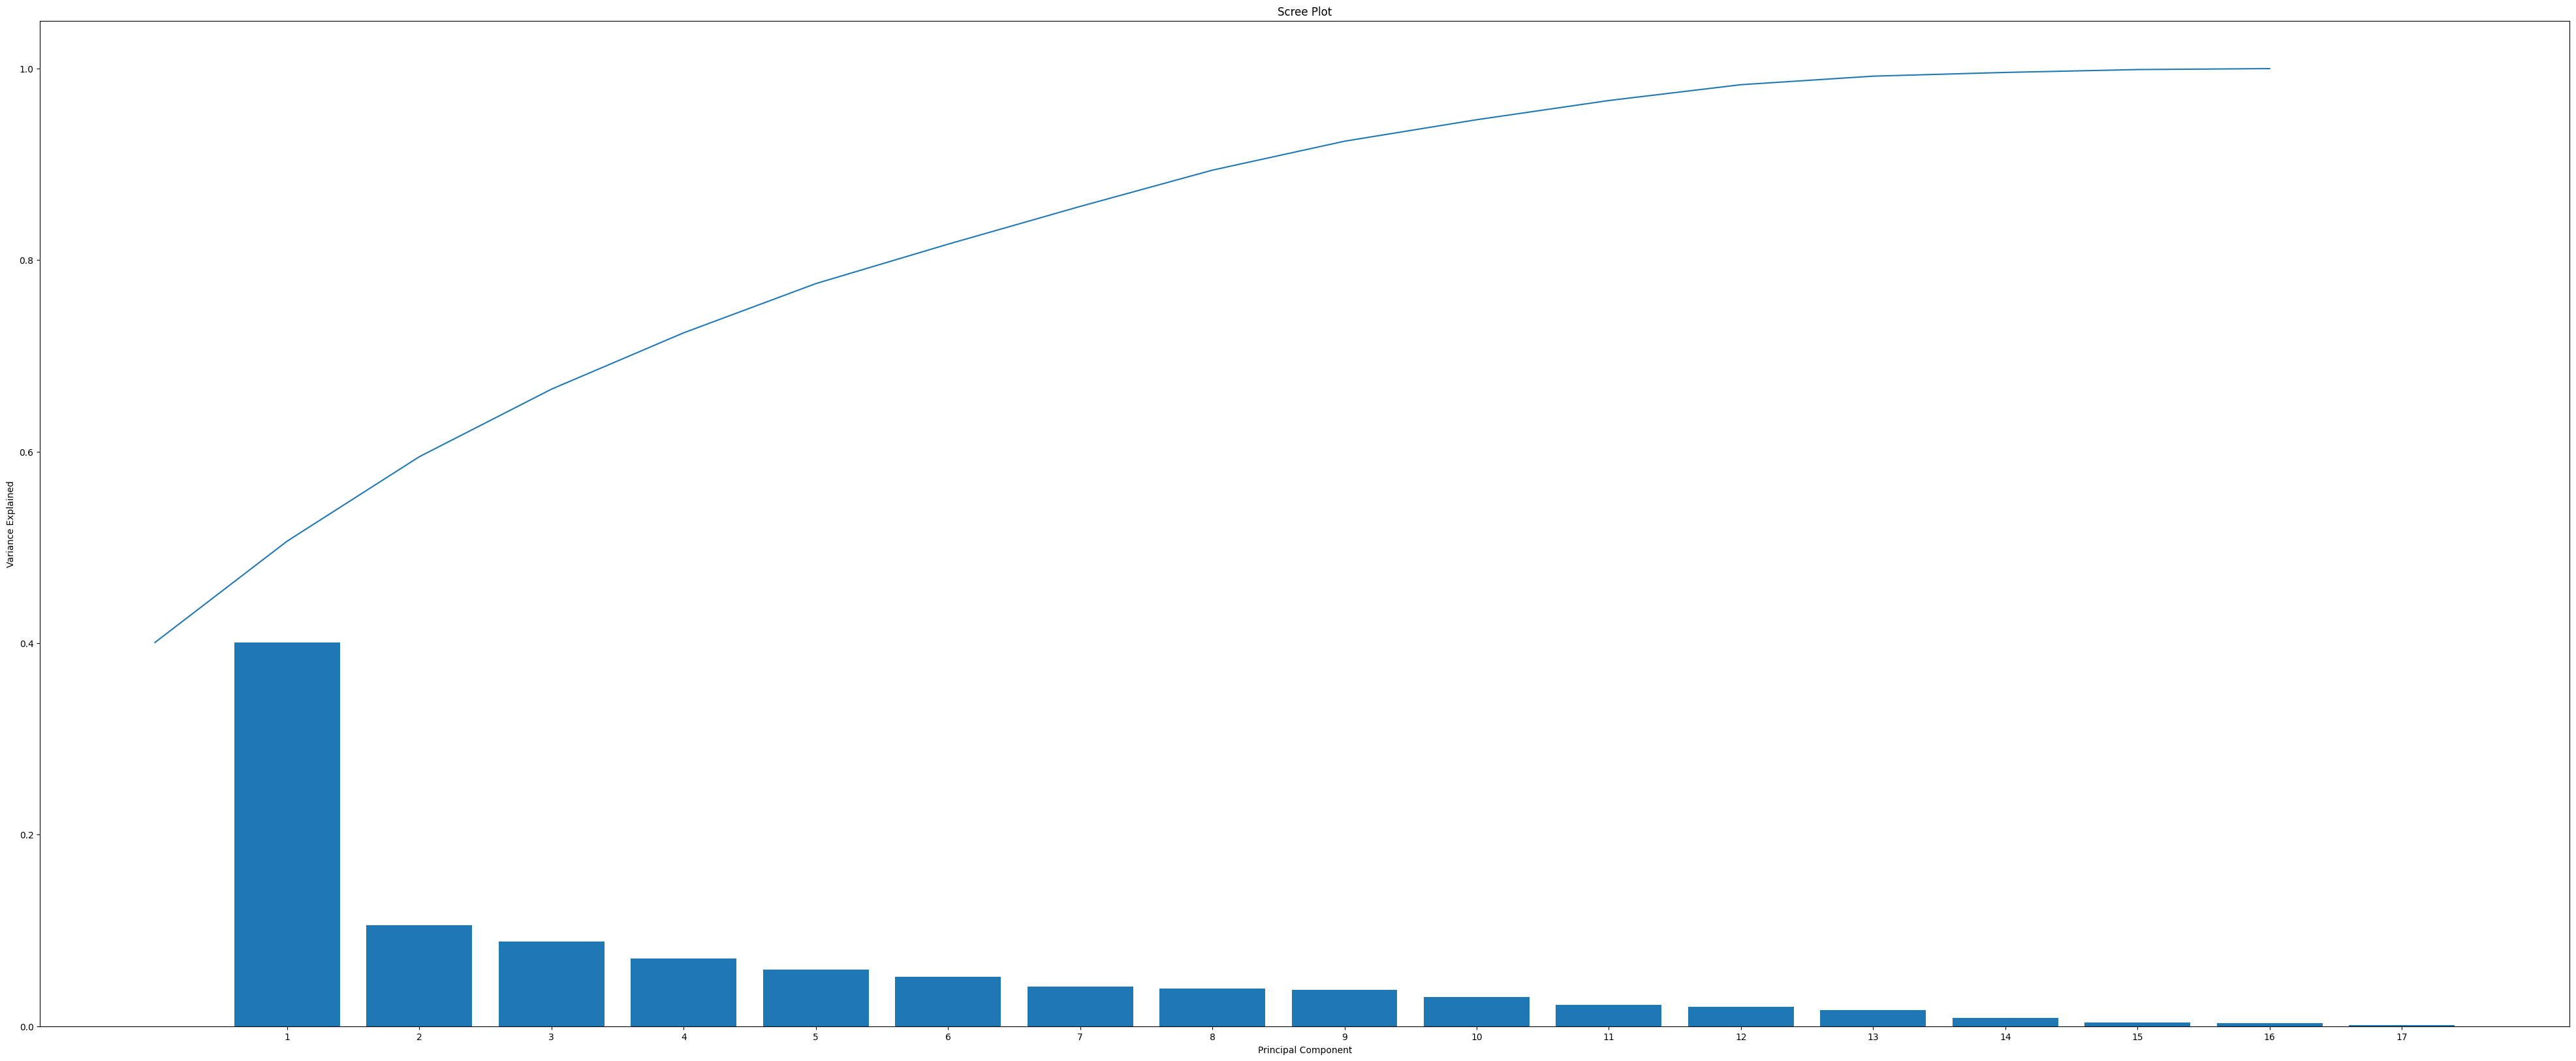

In [318]:
# Scree plot: Cumulative Explained Variance
fig, ax = plt.subplots(figsize=(50, 20))
plt.bar(range(1, pca.n_components_+1), pca.explained_variance_ratio_)
plt.xticks(range(1, pca.n_components_+1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [319]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Variance:",cumulative_variance)

# Choose the number of components that capture a specified percentage of variance
target_variance = 0.80
num_components = np.argmax(cumulative_variance >= target_variance) + 1

print(f'The number of components to capture {target_variance * 100}% variance: {num_components}')



Cumulative Variance: [0.40076341 0.50654594 0.59469682 0.66525501 0.72407777 0.77547849
 0.81662869 0.85605433 0.89391627 0.92415604 0.94660956 0.96665022
 0.98318514 0.99210531 0.99598825 0.99897822 1.        ]
The number of components to capture 80.0% variance: 7


In [320]:
# Use the selected number of components for further analysis or dimensionality reduction
final_pca = PCA(n_components=num_components,random_state=42)
nids_original_dataframe_pca = final_pca.fit_transform(dataset_features_standardized)

In [321]:
components = final_pca.components_.T

reduced_df_pca_columns = ['PC'+str(item) for item in range(0,num_components)]
nids_reduced_df = pd.DataFrame(nids_original_dataframe_pca, columns=reduced_df_pca_columns)
print(nids_reduced_df.head())


        PC0       PC1       PC2       PC3       PC4       PC5       PC6
0  0.611096  0.439842  0.649218 -0.231450 -0.002456 -0.159529 -0.310732
1 -2.085849  3.107987  6.636114  1.711167 -0.350553  1.167676  0.298901
2 -3.283183 -0.111491 -0.616534  0.425217 -0.027745 -0.283863 -0.107013
3  2.862209  0.016720 -1.070628  0.409787 -0.033414  0.474427 -0.016837
4  2.144208 -1.303503 -0.117883  0.150625 -0.013057 -0.594094  0.381216


<Figure size 1000x800 with 0 Axes>

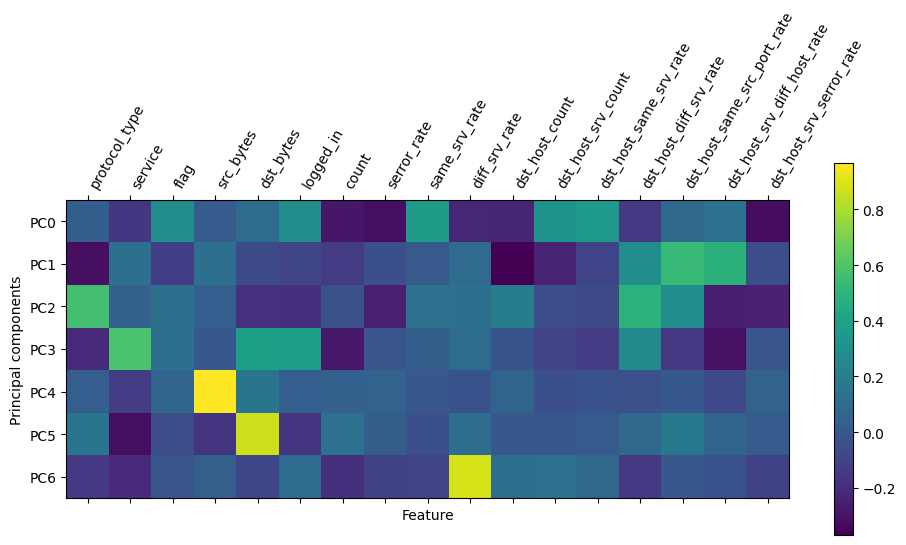

Details:


In [322]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
list_indx = [i for i in range(0,len(reduced_df_pca_columns))]

plt.matshow(final_pca.components_, cmap='viridis')
plt.yticks( list_indx, reduced_df_pca_columns)
plt.colorbar()
plt.xticks(range(len(nids_original_dataframe.drop('class',axis=1).columns.tolist())), nids_original_dataframe.drop('class',axis=1).columns.tolist(), rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

plt.show()

print("Details:")
dataset_pca = pd.DataFrame(final_pca.components_, columns=nids_original_dataframe.drop('class',axis=1).columns, index=reduced_df_pca_columns)
# print('\n\n', dataset_pca)


In [323]:
print(nids_reduced_df.shape)

(22656, 7)


In [324]:
nids_reduced_df['class'] = dataset_target

merged_df = nids_reduced_df.copy()

print(merged_df.info())

In [325]:
y = merged_df['class'].values
X = merged_df.drop(['class'], axis=1)

In [326]:
# Splitting the dataset into training and testing datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)  

In [327]:
print(X_train.values)

[[ 1.54285568 -0.6234069   0.09137062 ... -0.22968124 -1.20542022
  -0.12940627]
 [ 0.65496809  0.27499048  0.81668871 ...  0.05090614 -0.06749742
  -0.18860872]
 [ 2.422875   -0.97433313 -0.33241848 ... -0.01741733 -0.29578468
   0.33636301]
 ...
 [ 2.68519196 -1.540155   -0.90211647 ...  0.65435615  3.24739546
   0.03142618]
 [ 0.98980448 -1.41398511  2.11502159 ...  0.17835424  0.60330551
  -0.41611765]
 [ 2.18933243 -1.28040148 -0.10791636 ... -0.0220983  -0.63220194
   0.41391921]]


#### Logistic Regression

In [328]:

from sklearn.linear_model import LogisticRegression
# Create the logistic regression model
logre = LogisticRegression(solver='liblinear')


**10 Fold Cross Validaton for Logistic Regression**

In [329]:
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation
cv_scores = cross_val_score(logre, X_train, y_train, cv=5, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
# Fit the model on the entire dataset


Cross-validation scores: [0.93241379 0.93462069 0.92772414 0.92855172 0.93073951]
Mean cross-validation score: 0.9308099718352745


In [330]:
logre.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [331]:
# Predict the class for the test data (using the entire dataset)
y_pred = logre.predict(X_test)

In [332]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9300529567519858


In [333]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1979
           1       0.93      0.95      0.94      2553

    accuracy                           0.93      4532
   macro avg       0.93      0.93      0.93      4532
weighted avg       0.93      0.93      0.93      4532



In [334]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9268392346033668

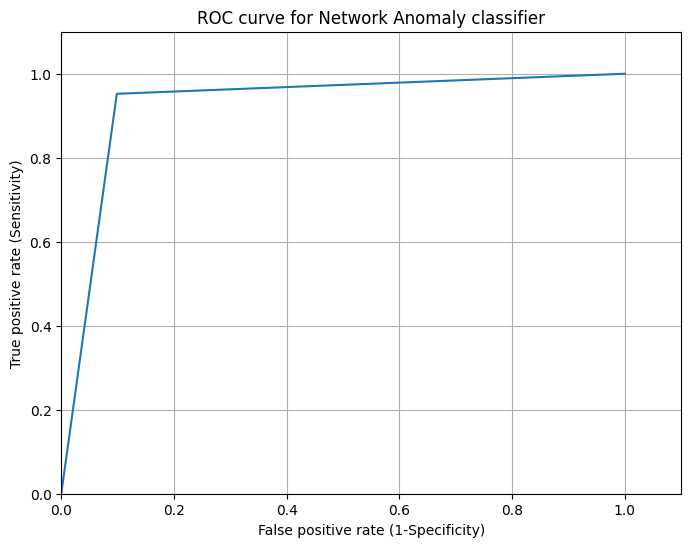

In [335]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.title('ROC curve for Network Anomaly classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

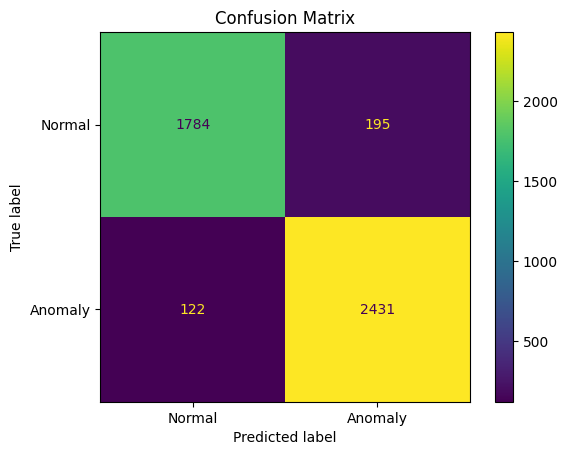

In [336]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal','Anomaly'])
disp.plot(cmap='viridis') 
plt.title('Confusion Matrix')
plt.show()


### RandomForest Classifier

In [337]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(criterion='gini', max_features='sqrt',max_leaf_nodes=10) 
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=10)

In [338]:
y_pred = clf_rf.predict(X_test)

In [339]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.9463812886142984


In [340]:
print(nids_original_dataframe['class'].value_counts())

class
1    12761
0     9895
Name: count, dtype: int64


In [341]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1979
           1       0.92      0.98      0.95      2553

    accuracy                           0.95      4532
   macro avg       0.95      0.94      0.94      4532
weighted avg       0.95      0.95      0.95      4532



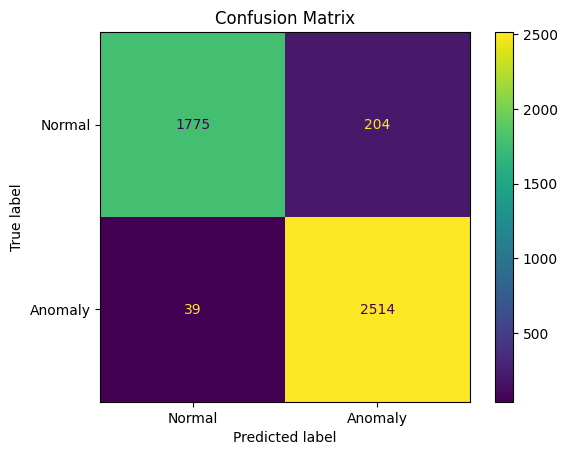

In [342]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal','Anomaly'])
disp.plot(cmap='viridis') 
plt.title('Confusion Matrix')
plt.show()


### K-Nearest neighbor Classifier

In [343]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the range of k values to search over
param_grid = {'n_neighbors': range(11, 21)} 

# Create a KNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best k value
grid_search = RandomizedSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameter (k value)
best_k = grid_search.best_params_['n_neighbors']

print("Best k value:", best_k)


Best k value: 11


In [344]:

knn = KNeighborsClassifier(n_neighbors=best_k) 


# Train the model using the training sets
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9887466902030009


In [345]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1979
           1       0.99      0.99      0.99      2553

    accuracy                           0.99      4532
   macro avg       0.99      0.99      0.99      4532
weighted avg       0.99      0.99      0.99      4532



### SVM

In [346]:
from sklearn.svm import SVC

# Create SVM classifier
svm_classifier = SVC(kernel = 'linear')


In [347]:
svm_classifier.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = svm_classifier.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
# print('Best Parameters:', best_params)
print('Accuracy:', accuracy)

Accuracy: 0.9333627537511032


In [348]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1979
           1       0.92      0.96      0.94      2553

    accuracy                           0.93      4532
   macro avg       0.94      0.93      0.93      4532
weighted avg       0.93      0.93      0.93      4532



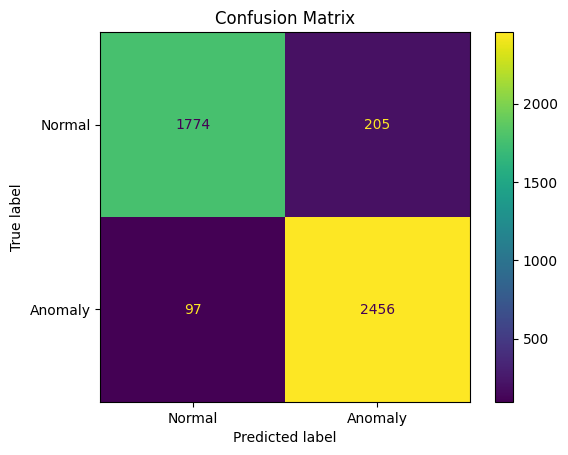

In [349]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal','Anomaly'])
disp.plot(cmap='viridis') 
plt.title('Confusion Matrix')
plt.show()


### Gaussian Naive Bayes 

In [350]:
from sklearn.naive_bayes import GaussianNB
# GAUSSIAN NAIVE BAYES
gnb = GaussianNB()

In [351]:
# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9254192409532216


In [352]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1979
           1       0.92      0.95      0.94      2553

    accuracy                           0.93      4532
   macro avg       0.93      0.92      0.92      4532
weighted avg       0.93      0.93      0.93      4532



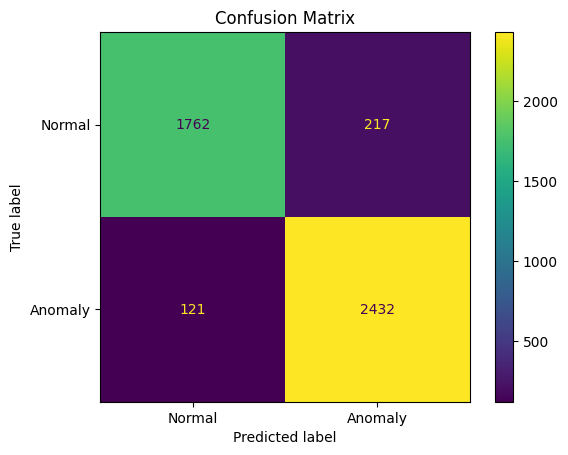

In [353]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal','Anomaly'])
disp.plot(cmap='viridis') 
plt.title('Confusion Matrix')
plt.show()


In [354]:
# Splitting the dataset into training and testing datasets
y = merged_df['class'].values
X = merged_df.drop(['class'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)  

In [355]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Define parameter distribution
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-4, 0, 5),
}

# Perform Randomized Search
random_search = RandomizedSearchCV(MLPClassifier(max_iter=1000, random_state=42, early_stopping=True), param_dist, cv=10, n_iter=5)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate model with best parameters
best_model = random_search.best_estimator_
print(best_model)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Parameters: {'solver': 'adam', 'hidden_layer_sizes': (50, 50), 'alpha': 0.01, 'activation': 'relu'}
MLPClassifier(alpha=0.01, early_stopping=True, hidden_layer_sizes=(50, 50),
              max_iter=1000, random_state=42)
Best Model Accuracy: 0.9883053839364518


In [356]:
from sklearn.neural_network import MLPClassifier

# Create MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,100) ,
                               activation="tanh",
                               solver=random_search.best_params_['solver'],
                               max_iter=500,
                               alpha=0.001,
                               early_stopping=True,
                               random_state=42)

mlp_classifier.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(50, 100), max_iter=500, random_state=42)

In [357]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9836716681376876


In [358]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1979
           1       0.98      0.99      0.99      2553

    accuracy                           0.98      4532
   macro avg       0.98      0.98      0.98      4532
weighted avg       0.98      0.98      0.98      4532



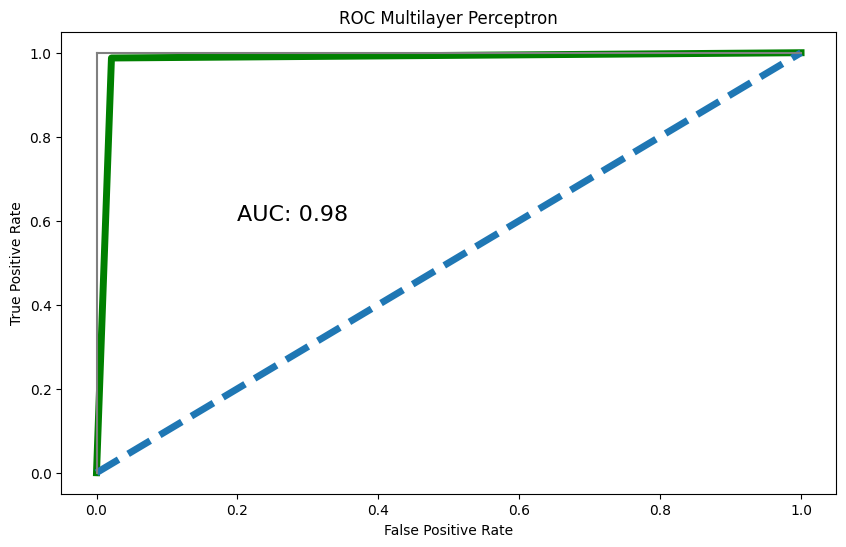

In [359]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC Multilayer Perceptron')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

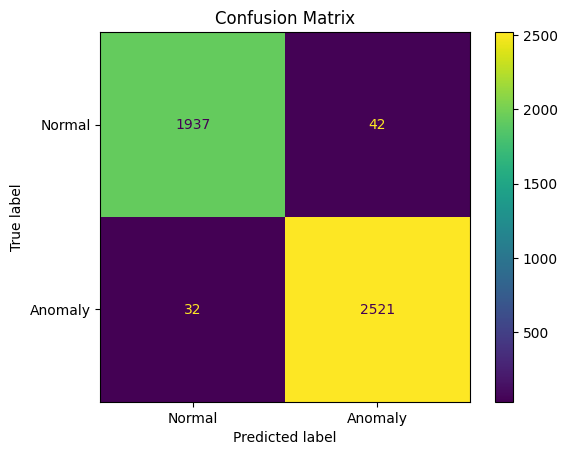

In [360]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal','Anomaly'])
disp.plot(cmap='viridis') 
plt.title('Confusion Matrix')
plt.show()


**Classification Report of all the models**

In [363]:

models = {"Logistic Reg":logre,"Random Forest":clf_rf, "SVM":svm_classifier, "Naive-Bayes":gnb, "Multi-Layer Percp":mlp_classifier}
accuracy = accuracy_score(y_test, y_pred)


from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(model_name,sym="*"):
    return sym*(25-len(model_name)//2)
target_names=["anomaly","normal"]
for model_name, model in models.items():
    print(model_name, model)
    print(line(model_name), model_name, 'Model Testing', line(model_name))
    print(confusion_matrix(y_test,model.predict(X_test) ))
    print(line(model_name,'-'))
    print(classification_report(y_test,model.predict(X_test) , target_names=target_names))
    print(line(model_name, '-'))

Logistic Reg LogisticRegression(solver='liblinear')
******************* Logistic Reg Model Testing *******************
[[1784  195]
 [ 122 2431]]
-------------------
              precision    recall  f1-score   support

     anomaly       0.94      0.90      0.92      1979
      normal       0.93      0.95      0.94      2553

    accuracy                           0.93      4532
   macro avg       0.93      0.93      0.93      4532
weighted avg       0.93      0.93      0.93      4532

-------------------
Random Forest RandomForestClassifier(max_leaf_nodes=10)
******************* Random Forest Model Testing *******************
[[1775  204]
 [  39 2514]]
-------------------
              precision    recall  f1-score   support

     anomaly       0.98      0.90      0.94      1979
      normal       0.92      0.98      0.95      2553

    accuracy                           0.95      4532
   macro avg       0.95      0.94      0.94      4532
weighted avg       0.95      0.95      0.95 

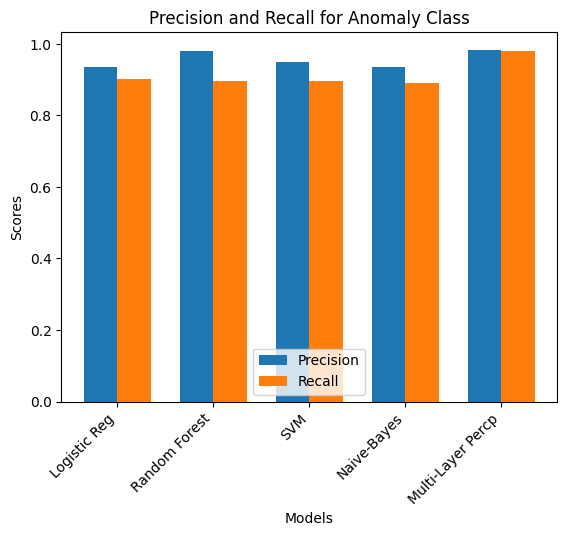

In [366]:
import matplotlib.pyplot as plt
import numpy as np

# Define models and their names
models = {"Logistic Reg": logre, "Random Forest": clf_rf, "SVM": svm_classifier, "Naive-Bayes": gnb, "Multi-Layer Percp": mlp_classifier}
model_names = list(models.keys())

# Initialize lists to store precision and recall scores
precision_scores = []
recall_scores = []

# Calculate precision and recall scores for each model
for model_name, model in models.items():
    report = classification_report(y_test, model.predict(X_test), target_names=target_names, output_dict=True)
    precision_scores.append(report["anomaly"]["precision"])
    recall_scores.append(report["anomaly"]["recall"])

# Plot bar chart
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, precision_scores, width, label='Precision')
bars2 = ax.bar(x + width/2, recall_scores, width, label='Recall')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall for Anomaly Class')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

plt.show()


**Confusion Matrix for the Models**

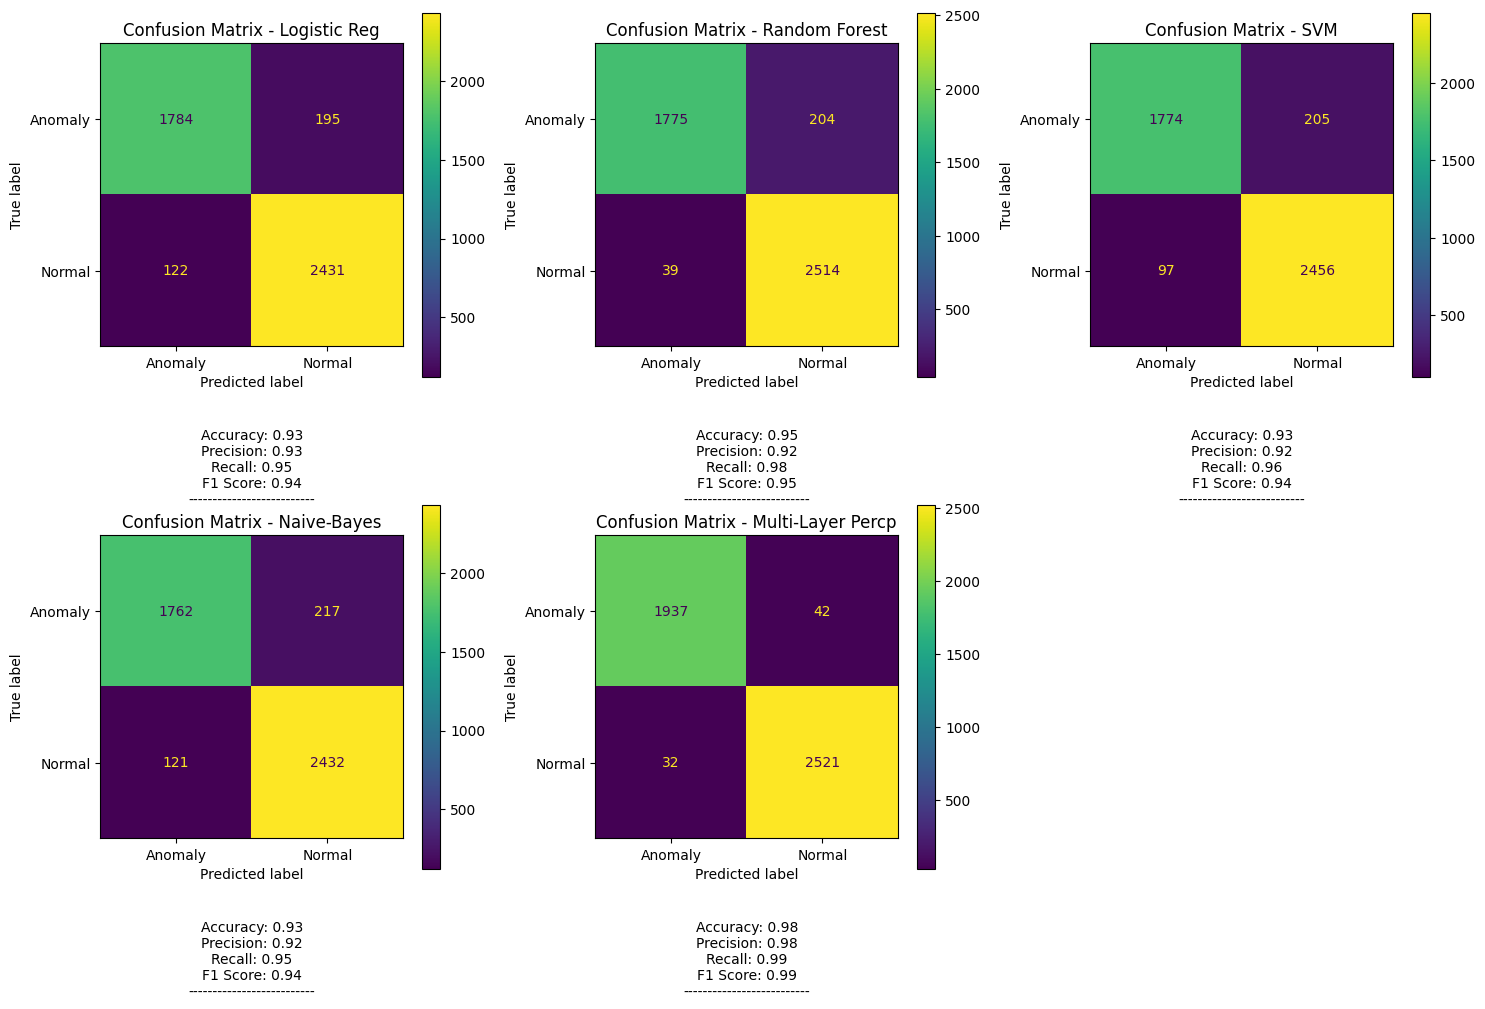

In [365]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Calculate the number of rows and columns for the grid layout
num_models = len(models)
num_cols = 3  # Number of columns in the grid
num_rows = (num_models + num_cols - 1) // num_cols  # Round up the number of rows

# Create the grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes if necessary
if num_rows == 1:
    axes = [axes]

# Iterate over the models and plot each confusion matrix
for i, (model_name, model) in enumerate(models.items()):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    
    # Display the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Anomaly', 'Normal'])
    disp.plot(ax=axes[row_idx][col_idx], cmap='viridis')
    axes[row_idx][col_idx].set_title(f'Confusion Matrix - {model_name}')
    
    # Add a small space after the confusion matrix
    axes[row_idx][col_idx].text(0, -0.1, '\n', horizontalalignment='center', verticalalignment='center', transform=axes[row_idx][col_idx].transAxes)
    
    # Calculate accuracy, precision, recall, and F1 score
    acc = accuracy_score(y_test, model.predict(X_test))
    precision = precision_score(y_test, model.predict(X_test))
    recall = recall_score(y_test, model.predict(X_test))
    f1 = f1_score(y_test, model.predict(X_test))
    
    # Display accuracy, precision, recall, and F1 score as text below the confusion matrix
       # Display accuracy, precision, recall, and F1 score as text below the confusion matrix
    axes[row_idx][col_idx].text(0.5, -0.4, f'Accuracy: {acc:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\n--------------------------',
                                 horizontalalignment='center', verticalalignment='center', transform=axes[row_idx][col_idx].transAxes)

    


# Remove any extra blank subplots
if num_models < num_rows * num_cols:
    for i in range(num_models, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
